In [251]:
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as st
from typing import Tuple, List, Dict, Optional
#from scipy.stats import pearsonr
import copy
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 100)

In [252]:
def hist_subplot(df, col, sd=1, darkmode=False, ax=None):
    
    title_fontsize = 20
    label_fontsize = 16
    tick_fontsize = 16
    legend_fontsize = 12
    
    if darkmode:
        facecolor = '0.1'
        color1 = '#B3B3B3'
        color2 = 'green'
        color3 = 'red'
    else:
        facecolor = 'white'
        color1 = '#051D40'
        color2 = '#55aeff'
        color3 = '#FF5757'
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6), facecolor=facecolor)
    else:
        fig = ax.get_figure()
       
    mean_val = df[col].mean()
    sd_val = df[col].std() * sd
    bin_edges = np.arange(np.floor(df[col].min()) - 0.5, np.ceil(df[col].max()) + 1.5, 1)
    sns.histplot(data=df[col], kde=False, bins=bin_edges, color=color2, ax=ax, edgecolor=color1)
    ax.set_xlabel("", color=color1, fontsize=label_fontsize)
    ax.set_ylabel("", color=color1, fontsize=label_fontsize)
    ax.set_title(col, color=color1, fontsize=title_fontsize, fontweight='bold')
    max_x = df[col].max()

    if max_x < 10.5:
        ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
        ax.set_xlim(-0.5, 10.5)
    elif max_x < 14:
        ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
        ax.set_xlim(-0.5, 12.8)
    elif max_x < 21:
        ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20])
        ax.set_xlim(-0.5, 20.5)
    else:
        ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
        ax.set_xlim(-0.5, 100.5)

    #ax.set_xlim(-0.5, max_x + 0.5)
    ax.set_ylim(0, None)
    #ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    if sd:
        ax.axvline(x=mean_val, color=color3)
        ax.axvline(x=mean_val + sd_val, color=color3, linestyle='--')
        ax.axvline(x=mean_val - sd_val, color=color3, linestyle='--')
        ax.legend([f"Mean {mean_val:.1f}", f"SD ±{sd_val:.1f}"], loc='upper left', facecolor=facecolor, edgecolor=color1, fontsize=legend_fontsize)

        for text in ax.legend_.get_texts():
            text.set_color(color1)
    
    ax.set_facecolor(facecolor)
    for spine in ax.spines.values():
        spine.set_edgecolor(color1)
        
    ax.tick_params(axis='x', colors=color1, labelsize=tick_fontsize)
    ax.tick_params(axis='y', colors=color1, labelsize=tick_fontsize)
    
    return fig, ax

In [253]:
def plot_2x2_subplots(specs, title=None, darkmode=False):
    if len(specs) != 4:
        raise ValueError("The 'specs' list must contain exactly 4 tuples.")
    
    if darkmode:
        facecolor = '0.1'
        color1 = '#B3B3B3'
        color2 = 'green'
        color3 = 'red'
    else:
        facecolor = 'white'
        color1 = '#051D40'
        color2 = '#55aeff'
        color3 = '#FF5757'

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), facecolor=facecolor)
    for idx, ax in enumerate(axes.flatten()):
        #hist_subplot(*specs[idx], ax=ax)
        hist_subplot(*specs[idx][:3], darkmode=darkmode, ax=ax)
    
    if title is not None:
        fig.suptitle(f"{title} Frequency vs. Score", fontsize=28, fontweight='bold', color=color1, y=0.99)
    
    fig.tight_layout()
    plt.show()

In [254]:
def make_table(df, cols):
    # Initialize an empty list to hold the summary tables
    tables = []

    # Loop through the columns in cols and calculate the summary statistics
    for col in cols:
        # Calculate the mean, median, and standard deviation
        col_mean = df[col].mean()
        col_median = df[col].median()
        col_sd = df[col].std()

        # Calculate the mode
        col_mode = df[col].mode()
        if len(col_mode) == 0:
            col_mode = np.nan
        else:
            col_mode = col_mode[0]

        # Create a summary table for the column
        table = pd.DataFrame({'Statistic': ['Mean', 'Median', 'Mode', 'Standard Deviation'],
                              'Value': [col_mean, col_median, col_mode, col_sd]})
        table.set_index('Statistic', inplace=True)

        # Add the summary table to the list of tables
        tables.append(table)

    # Create a figure with a grid of subplots
    num_cols = len(cols)
    fig, axs = plt.subplots(nrows=1, ncols=num_cols, figsize=(num_cols*5, 5))

    # Loop through the subplots and plot the summary tables
    for i, ax in enumerate(axs):
        # Get the summary table for the current column
        table = tables[i]

        # Plot the table as a bar chart
        ax.barh(table.index, table['Value'], height=0.5)

        # Set the x-axis limits
        ax.set_xlim([0, df[cols[i]].max() + df[cols[i]].max()*0.1])

        # Set the x-axis label
        ax.set_xlabel(cols[i])

        # Hide the y-axis label and ticks
        ax.set_yticklabels([])
        ax.set_yticks([])

        # Add the value labels to the bars
        for j, value in enumerate(table['Value']):
            ax.text(value + value*0.01, j, f'{value:.2f}', ha='left', va='center')

    # Adjust the spacing between the subplots
    plt.subplots_adjust(wspace=0.3)

    # Show the plot
    plt.show()

In [255]:
def make_table(df, data):

    title = 'Table 1: Statistics Summary'
    color1 = '#051D40'
    color2 = '#051D40'

    # Initialize an empty list to hold the summary tables
    tables = []

    # Loop through the tuples in data and calculate the summary statistics
    for df_temp, col in data:
        # Calculate the mean, standard deviation, median, and mode
        col_mean = df_temp[col].mean()
        col_sd = df_temp[col].std()

        bins = np.arange(np.floor(df_temp[col].min()-1.5), np.ceil(df_temp[col].max()+1.5), 1)
        col_median = np.median(df_temp[col])
        col_median_bin = bins[np.searchsorted(bins, col_median)]
        col_median = int(col_median_bin)

        hist, _ = np.histogram(df_temp[col], bins=bins)
        col_mode_bin = bins[np.argmax(hist)]
        col_mode = int(col_mode_bin)

        # Create a summary table for the column
        table = pd.DataFrame({'Mean': [col_mean], 'Median': [col_median], 'Mode': [col_mode], 'SD': [col_sd]})
        table.index = [col]

        # Add the summary table to the list of tables
        tables.append(table)

    # Concatenate the summary tables into a single DataFrame
    summary_df = pd.concat(tables, axis=0)

    # Set up the table plot
    fig, ax = plt.subplots()
    ax.axis('off')
    ax.axis('tight')

    # Create the table plot
    table = ax.table(cellText=summary_df.applymap(lambda x: f'{x:.1f}' if x not in [int(x), np.nan] else f'{int(x)}').values,
                     colLabels=summary_df.columns,
                     rowLabels=summary_df.index,
                     loc='center',
                     cellLoc='center')

    # Set the title of the table
    #ax.set_title(title, fontweight='bold', fontsize=16, color=color1, pad=-1020)
        # Set the title of the table
    title_obj = ax.set_title(title, fontweight='bold', fontsize=16, color=color1)
    title_obj.set_position([.15, 0])

    # Format the cells of the table
    table.auto_set_font_size(False)
    table.set_fontsize(14)
    table.scale(1, 2)

    # Set the color of the cell text
    for cell in table.get_celld().values():
        cell.set_text_props(color=color1)

    # Set the color of the gridlines
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_linestyle('-')
            cell.set_edgecolor(color2)
        else:
            cell.set_linestyle('-')
            cell.set_edgecolor(color2)

    # Show the plot
    plt.show()

### Code Execution:

In [256]:
df = pd.read_csv('data/combined_final.csv')
df.tail(1)
df = df.drop(columns={'text', 'link'})
df.head(1)
#df = df.drop(columns={'hcs', 'aics'})

,smog,cole,auto,dale,pows,forc,spac,gunn,fleG2,fleS,rank,word_count,hcs,aics
0,12.0,12.0,12.0,10.0,16.2,16.3,5.0,13.2,12.0,23.5,15,200.0,89.878726,10.121275


In [257]:
rename_dict = {'smog': 'Smog Index', 'cole': 'Coleman-Liau Index', 'auto': 'Automated Readability Index', 'dale': 'Dale-Chall Index', 'pows': 'Powers-Sumner-Kearl Index', 'forc': 'FORCAST Grade', 'spac': 'Spache Readability Grade', 'gunn': 'Gunning-Fog Index', 'fleG2': 'Flesch-Kincaid Grade', 'fleS': 'Flesch Reading Ease Index'}
df = df.rename(columns=rename_dict)

In [258]:
new_order = ['rank', 'Flesch Reading Ease Index', 'Gunning-Fog Index', 'FORCAST Grade', 'Dale-Chall Index', 'Powers-Sumner-Kearl Index','Automated Readability Index', 'Flesch-Kincaid Grade', 'Coleman-Liau Index', 'Smog Index', 'Spache Readability Grade', 'word_count', 'aics', 'hcs']
df = df.reindex(columns=new_order)

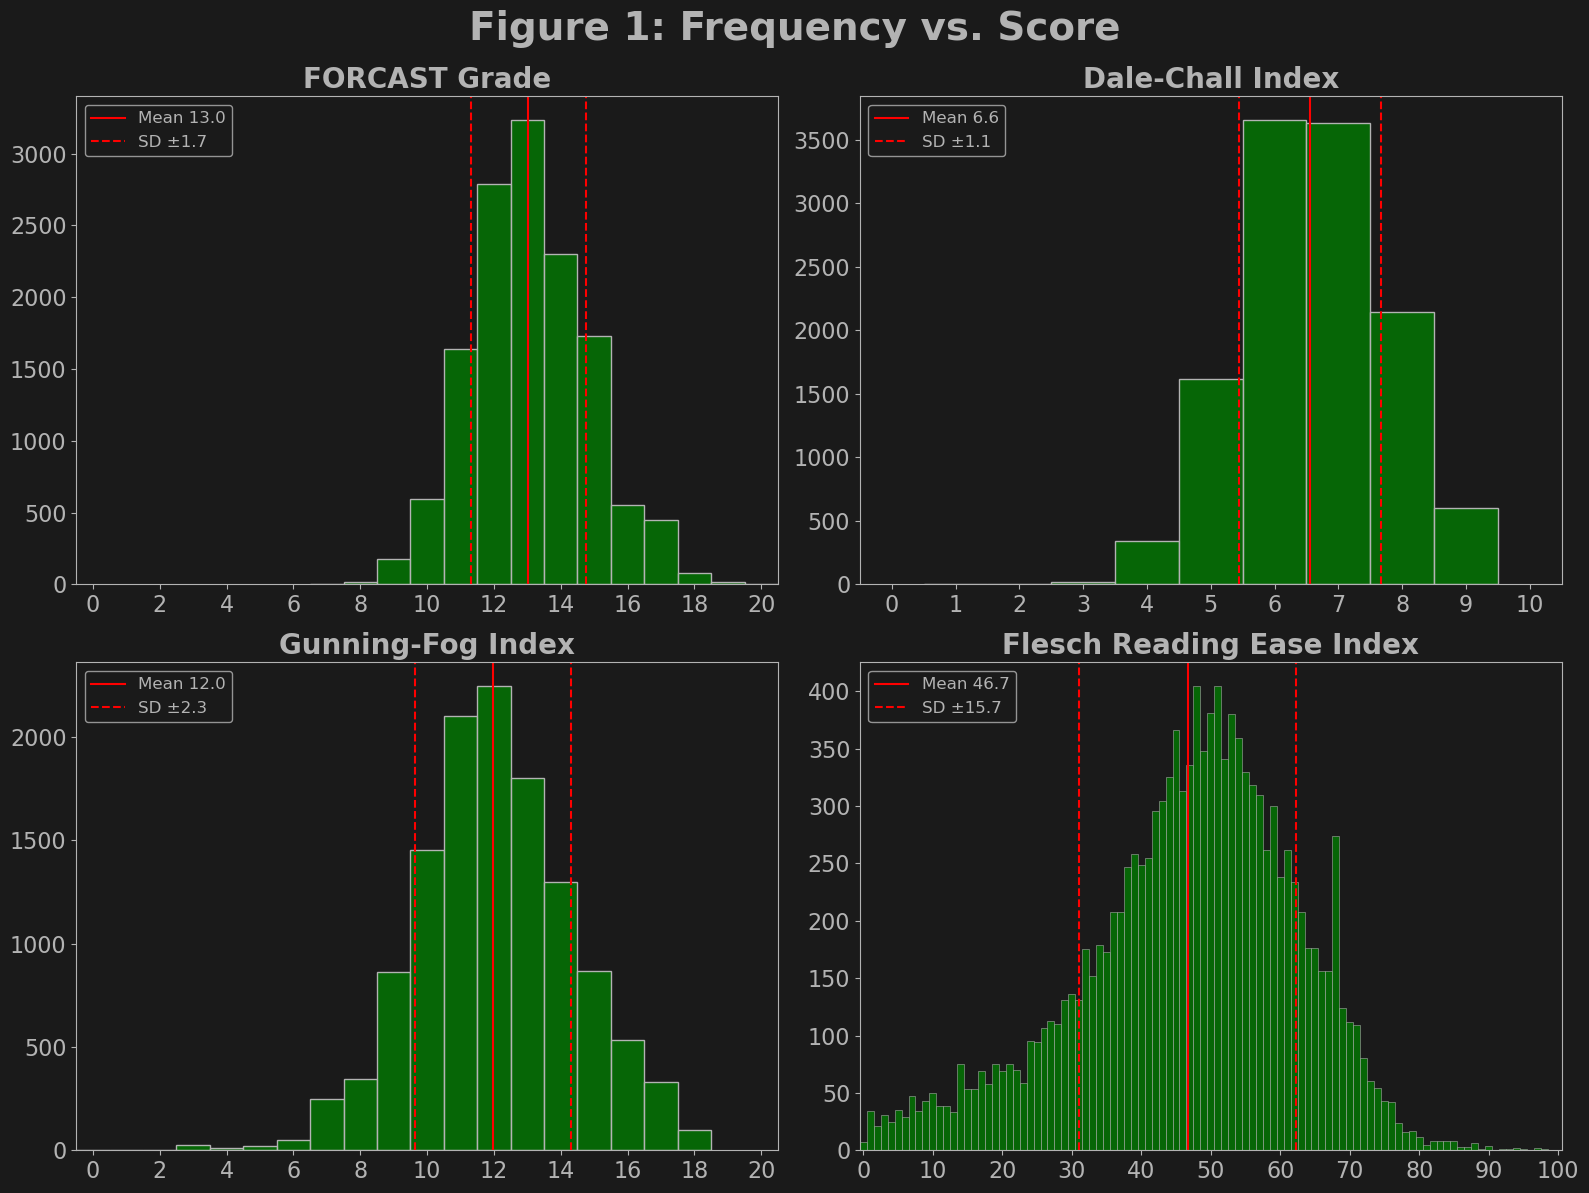

In [259]:
col_1 = 'FORCAST Grade'
df_fg = df[(df[col_1] > 0) & (df[col_1] < 20)].copy(deep=True)
df_fg = df_fg[['rank', col_1, 'word_count', 'aics', 'hcs']]

col_2 = 'Dale-Chall Index'
df_dci = df[(df[col_2] > 0) & (df[col_2] < 9)].copy(deep=True)
df_dci = df_dci[['rank', col_2, 'word_count', 'aics', 'hcs']]

col_3 = 'Gunning-Fog Index'
df_gfi = df[(df[col_3] > 0) & (df[col_3] < 17.9)].copy(deep=True)
df_gfi = df_gfi[['rank', col_3, 'word_count', 'aics', 'hcs']]

col_4 = 'Flesch Reading Ease Index'
df_fre = df[(df[col_4] > 0.1) & (df[col_4] < 99.9)].copy(deep=True)
df_fre = df_fre[['rank', col_4, 'word_count', 'aics', 'hcs']]

specs = [(df_fg, col_1, 1),
         (df_dci, col_2, 1),
         (df_gfi, col_3, 1),
         (df_fre, col_4, 1)
         ]

plot_2x2_subplots(specs, title='Figure 1:', darkmode=True)

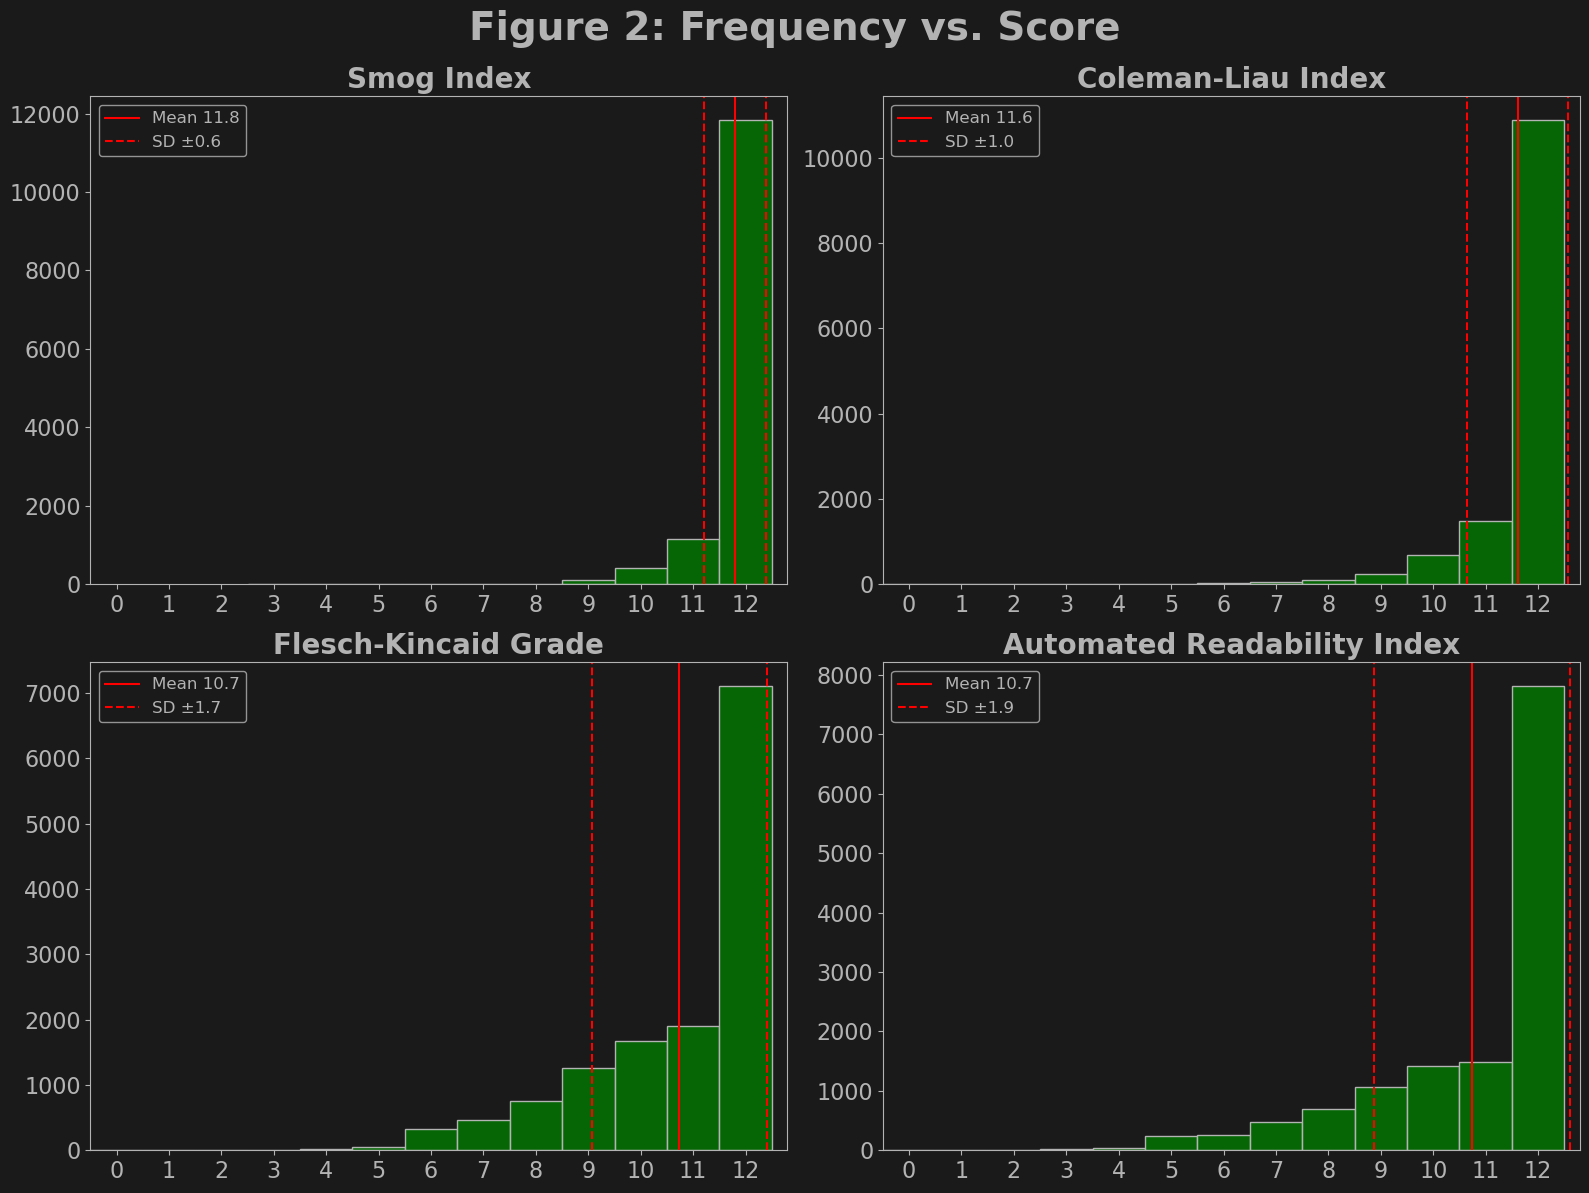

In [260]:
col_1 =  'Smog Index'
df_si = df[(df[col_1] > 0) & (df[col_1] < 20)].copy(deep=True)
df_si = df_si[['rank', col_1, 'word_count', 'aics', 'hcs']]

col_2 = 'Coleman-Liau Index'
df_cli = df[(df[col_2] > 0) & (df[col_2] < 20)].copy(deep=True)
df_cli = df_cli[['rank', col_2, 'word_count', 'aics', 'hcs']]

col_3 = 'Flesch-Kincaid Grade'
df_fcg = df[(df[col_3] > 0) & (df[col_3] < 20)].copy(deep=True)
df_fcg = df_fcg[['rank', col_3, 'word_count', 'aics', 'hcs']]

col_4 = 'Automated Readability Index'
df_ari = df[(df[col_4] > 0) & (df[col_4] < 20)].copy(deep=True)
df_ari = df_ari[['rank', col_4, 'word_count', 'aics', 'hcs']]

specs = [(df_si, col_1, 1), (df_cli, col_2, 1), (df_fcg, col_3, 1), (df_ari, col_4, 1)]

plot_2x2_subplots(specs, title='Figure 2:', darkmode=True)

In [261]:
df.columns

Index(['rank', 'Flesch Reading Ease Index', 'Gunning-Fog Index',
       'FORCAST Grade', 'Dale-Chall Index', 'Powers-Sumner-Kearl Index',
       'Automated Readability Index', 'Flesch-Kincaid Grade',
       'Coleman-Liau Index', 'Smog Index', 'Spache Readability Grade',
       'word_count', 'aics', 'hcs'],
      dtype='object')

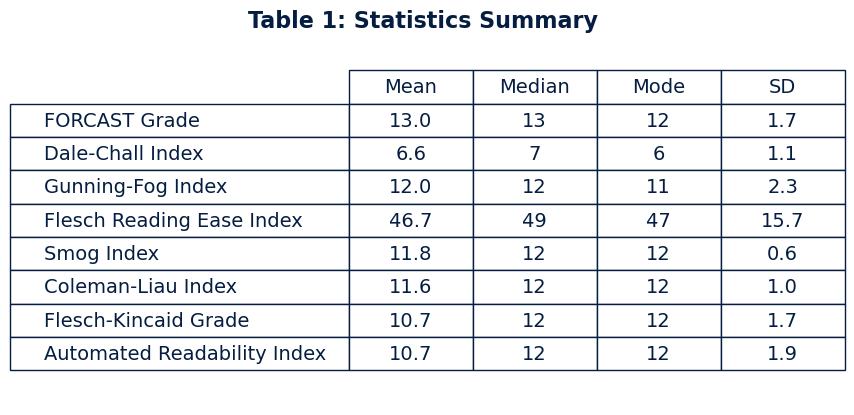

In [262]:
data = [(df_fg, 'FORCAST Grade'), (df_dci, 'Dale-Chall Index'), (df_gfi, 'Gunning-Fog Index'),
        (df_fre, 'Flesch Reading Ease Index'), (df_si, 'Smog Index'), (df_cli, 'Coleman-Liau Index'), (df_fcg, 'Flesch-Kincaid Grade'), (df_ari,'Automated Readability Index' )]
make_table(df, data)